In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

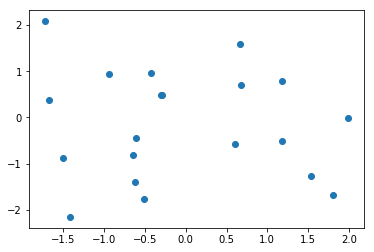

In [3]:
%matplotlib inline
a=tf.random_normal([2,20])
sess=tf.Session()
out=sess.run(a)
x,y=out
plt.scatter(x,y)
plt.show()

In [3]:
import tensorflow as tf

In [7]:
import tensorflow as tf
a=tf.constant(5,name="input_a")
b=tf.constant(3,name="input_b")
c=tf.multiply(a,b,name="mul_c")
d=tf.add(a,b,name="add_d")
e=tf.add(c,d,name="add_e")
sess=tf.Session()
output=sess.run(e)
writer=tf.summary.FileWriter('./my_graph',sess.graph)
writer.close()
sess.close()

In [13]:
import tensorflow as tf
a=tf.constant(5,name="input_a")
b=tf.constant(3,name="input_b")
c=a+b
print c
sess=tf.Session()
print sess.run(c)
sess.close()

Tensor("add_3:0", shape=(), dtype=int32)
8


In [16]:
c=tf.add(3,5,name="add_dd")
print c
sess=tf.Session()
print sess.run(c)
sess.close()

Tensor("add_dd:0", shape=(), dtype=int32)
8


In [18]:
a=tf.add(3,5)
b=a*3
sess=tf.Session()
replace_dict={a:15}
print sess.run(b,feed_dict=replace_dict)
sess.close()

45


In [19]:
with tf.Session() as sess:
    a=tf.add(3,5)
    b=a*3
    sess=tf.Session()
    replace_dict={a:15}
    print sess.run(b,feed_dict=replace_dict)

45


In [20]:
import numpy as np

In [22]:
a=tf.placeholder(tf.int32,shape=[2],name="my_input")
b=tf.reduce_prod(a,name="prod_b")
c=tf.reduce_sum(a,name="sum_c")
d=tf.add(b,c,name="add_d")
with tf.Session() as sess:
    input_dict={a: np.array([5,3], dtype=np.int32)}
    print sess.run(d,feed_dict=input_dict)

23


In [42]:
import tensorflow as tf
my_var=tf.Variable(3,name="my_variable")
print my_var.value()
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
print sess.run(my_var)
sess.close()

Tensor("my_variable_17/read:0", shape=(), dtype=int32)
3


In [43]:
with tf.Session() as sess:
    a=tf.Variable(tf.zeros([2,2]),name="mv1")
    init=tf.global_variables_initializer()
    sess.run(init)
    print sess.run(a)

[[ 0.  0.]
 [ 0.  0.]]


In [44]:
with tf.Session() as sess:
    a=tf.Variable(tf.ones([6]),name="mv2")
    init=tf.global_variables_initializer()
    sess.run(init)
    print sess.run(a)

[ 1.  1.  1.  1.  1.  1.]


In [2]:
my_v=tf.Variable(11)
my_v2=my_v.assign(my_v*2)
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print sess.run(my_v2)
    print sess.run(my_v2)
with tf.Session() as sess:
    sess.run(init)
    print sess.run(my_v2)
    print sess.run(my_v2)

22
44
22
44


In [6]:
import tensorflow as tf
import numpy as np
a=np.array([2,3],dtype=np.int32)
b=np.array([4,5],dtype=np.int32)
c=tf.add(a,b,name="my_add_op")
with tf.Session() as sess:
    print sess.run(c)

[6 8]


In [ ]:
import tensorflow as tf
grahp=tf.Graph()
with grahp.as_default():
    with tf.name_scope('variables'):
        global_step=tf.Variable(0,dtype=tf.int32,trainable=False,name="global_step")
        total_output=tf.Variable(0.0,dtype=tf.float32,trainable=False,name="total_output")
    with tf.name_scope("input"):
        a=tf.placeholder(tf.float32,shape=[None],name="input_placeholder_a")
    with tf.name_scope(intermediate_layer):
        b=tf.reduce_prod(a,name="product_b")
        c=tf.reduce_sum(a,name="sum_c")
    with tf.name_scope("output"):
        output=tf.add(b,c,name="output")
    with tf.name_scope("update"):
        update_total=total_output.assign_add(output)
        increment_step=global_step.assign_add(1)
    with tf.name_scope("summaries"):
        avg=tf.div(update_total,tf.cast(increment_step,tf.float32),name="average")
        tf.summary.scalar(b'Output',output,name="output_summary")
        tf.summary.scalar(b'Sum of outputs over time',update_total,name="total_summary")
        tf.summary.scalar(b'Average of outputs over time',avg,name="average_summary")
        